#Taller 5 - Algoritmos Genéticos

Parte 3: Implementación del algoritmo.

In [1]:
#Funciones Auxiliares
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

class genetic_algorithm:

  def __init__(self, genome_size, pop_size, mut_chance, gens, func, search_range, bin = False):
    self.search_range = search_range
    self.adjusted_range = 0, self.search_range[1] - self.search_range[0]
    self.genome_size = genome_size
    self.pop_size = pop_size
    self.mut_chance = mut_chance
    self.gens = gens
    self.func = func
    self.adjusted_func = lambda x: self.func(x + self.search_range[0])
    self.pop = self.gen_pop()
    self.history = [self.pop]
    self.maximum = [max(self.pop, key = lambda x: genetic_algorithm.decimalListToDecimal(x,self.dot))]
    self.iterate()

  def decimalListToDecimal(lista, decimal_point):
    return sum([lista[k] * 10 ** (decimal_point - 1 - k) for k in range(len(lista))])

  def binaryListToDecimal(lista, decimal_point):
    return sum([lista[k] * 2 ** (decimal_point - 1 - k) for k in range(len(lista))])

  def gen_pop(self):
    self.curr_gen = 1
    dot = str(self.adjusted_range[1]).find('.')
    if dot == -1:
      self.dot = len(str(self.adjusted_range[1]))
    else:
      self.dot = dot
    self.first_digit = int([k for k in str(self.adjusted_range[1]) if k not in {"0","."}][0])
    pop = list()
    while len(pop) < self.pop_size:
      individual = [np.random.choice(range(self.first_digit))] +list(np.random.choice(range(10), self.genome_size-1))
      pop.append(individual)
    return pop

  def getFitness(self):
    ft = np.array([self.adjusted_func(self.adjusted_func(genetic_algorithm.decimalListToDecimal(x,self.dot))) for x in self.pop])
    return ft / sum(ft)

  def mutate(self):
    for individual in self.pop:
      if np.random.random() < self.mut_chance:
        original = individual[0]
        individual[0] = np.random.choice(range(self.first_digit))
      for i in range(1,len(individual)):
        if np.random.random() < self.mut_chance:
          individual[i] = np.random.choice(range(10))

  def genOffspring(self):
    prob = self.getFitness()
    offspring = list()
    for i in range(self.pop_size // 2):
      parent1, parent2 = np.random.choice(self.pop_size, 2, p=prob)
      cross_point = np.random.randint(self.genome_size)
      fst_child = self.pop[parent1][:cross_point] + self.pop[parent2][cross_point:]
      second_child = self.pop[parent2][:cross_point] + self.pop[parent1][cross_point:]
      lower, upper = self.adjusted_range[0], self.adjusted_range[1]
      offspring.append(fst_child)
      offspring.append(second_child)
    self.pop = offspring
    self.mutate()
    self.maximum.append(max(self.pop, key = lambda x: self.adjusted_func(genetic_algorithm.decimalListToDecimal(x,self.dot))))
    self.history.append(self.pop)
    self.curr_gen += 1

  def iterate(self):
    while self.curr_gen < self.gens:
      self.genOffspring()

  def get_max(self):
    return max(self.history[-1], key = lambda x: self.adjusted_func(genetic_algorithm.decimalListToDecimal(x, self.dot)))


  def gen_comparison(self):
    fig, ax = plt.subplots()
    x = np.arange(self.search_range[0], self.search_range[1], 0.01)
    line, = ax.plot(x, np.array(list(map(self.func, x))))
    k = [genetic_algorithm.decimalListToDecimal(x,self.dot) + self.search_range[0] for x in self.maximum]
    self.crosses = ax.plot(k, list(map(self.func, k)), '-', color= 'c')
    self.crosses = ax.plot(k, list(map(self.func, k)), 'x', color= 'black')
    self.crosses = ax.plot([k[-1]], list(map(self.func, [k[-1]])), 'X', color= 'red')
    self.crosses = ax.plot([k[0]], list(map(self.func, [k[0]])), 'X', color= 'green')
    plt.show()

#Punto 4

Nombremos los parámetros 


*   $t_g$ = tamaño del genoma
*   $t_p$ = tamaño de la población
*   $g$ = generaciones
*   $r$ = rango de búsqueda

Si $g$ es el número de generaciones, cualquierca que sea la complejidad de cada iteración, llamémosla $C$, la complejidad total será $nC$.

Comencemos con la generación de un individuo. Se debe generar una lista del tamaño del genoma: esto se hace generando $t_g$ números aleatorios. La complejidad de esta acción es $O(t_g)$. Esto debe hacerse $t_p$ veces, luego la generación de la primera generación demanda un tiempo $O(t_g t_p)$.

La creación de la siguiente generación requiere emparejar a los individuos de la población , esto se hace en $t_p / 2$ pasos. Se selecciona un punto de corte al azar, y se  crean los hijos. Esto se hace en tiempo contante, por lo que no tiene peso en el análisis final. Luego, debe aplicarse la mutación. Debe hacerse con cada individuo entrada por entrada, por lo que su complejidad es $O(t_g t_p)$. la complejidad total es pues $$O(g)(O(t_g t_p) + O(t_g t_p))$$

Que puede simplificarse como:

$$O(g t_g t_p)$$

  Si $g = t_g = t_p$ entonces:

  $$O(n^3)$$





#Punto 5

Vamos a probar algunas funciones para observar el comportamiento del agente selector

#Una función Oscilante:

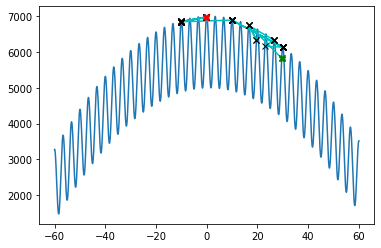

In [71]:
import math

model = genetic_algorithm(7,10,0.02,100, lambda x: -(0.1+(1-x)**2-1000*math.cos(6*math.pi*(x / 10)))+6000, (-60,60))
model.pop
model.dot
model.gen_comparison()

#Con menos frecuencia

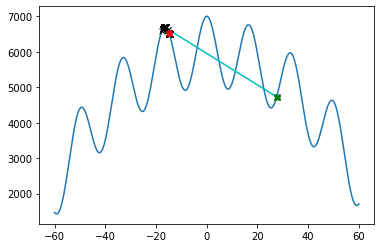

In [2]:
import math

model = genetic_algorithm(7,10,0.02,100, lambda x: -(0.1+(1-x)**2-1000*math.cos(6*math.pi*(x / 50)))+6000, (-60,60))
model.pop
model.dot
model.gen_comparison()

#Con menos amplitud

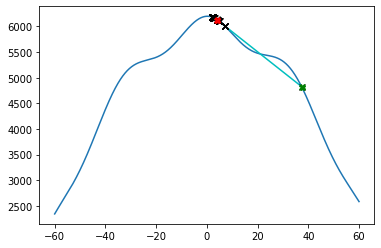

In [5]:
import math

model = genetic_algorithm(7,10,0.02,100, lambda x: -(0.1+(1-x)**2-200*math.cos(6*math.pi*(x / 100)))+6000, (-60,60))
model.pop
model.dot
model.gen_comparison()

#Lineal

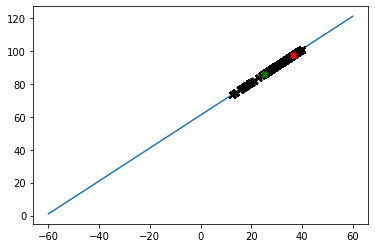

In [10]:
import math

model = genetic_algorithm(7,10,0.02,10000, lambda x: x + 61, (-60,60))
model.pop
model.dot
model.gen_comparison()

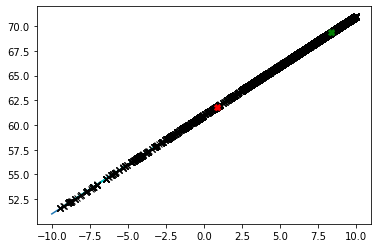

In [11]:
import math

model = genetic_algorithm(7,10,0.02,10000, lambda x: x + 61, (-10,10))
model.pop
model.dot
model.gen_comparison()

#Punto 6

Los parámetros utilizados en este algoritmo genético están relacionados con la presición. Entre más largo el genoma, y más grande la población, el resultado será más preciso. Sin embargo, la població puede  estabilizarse prematuramente, llegando a una solución sub optima, que no necesariamente es un másximo local siquiera. Como vimos en el punto **4**, tanto el tamaño de la población, como el número de generaciones, así como  el tamaño del genoma están directamente relacionadas con la complejidad y el tempo de ejecución. 

#Punto 7

La probabilidad de mutación impide convergencia prematura, sin embargo, estará relacionado con una convergencia a la solución mucho más lenta (asumiendo uno tenga todas las generaciones que pueda requerir). Dependiendo de la tolerancia al error, reducir el tamaño del genoma se traduce en menos pasos por iteración, y una convergencia rápida, a pesar de que el error será mayor.